Take Home Assignment 3

3.0 Install any dependencies if needed 


In [2]:
!pip install supervision
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/43.6 MB ? eta -:--:--
    --------------------------------------- 0.8/43.6 MB 2.2 MB/s eta 0:00:20
    --------------------------------------- 1.0/43.6 MB 2.3 MB/s eta 0:00:19
   - -------------------------------------- 1.6/43.6 MB 2.1 MB/s eta 0:00:21
   - -------------------------------------- 2.1/43.6 MB 2.1 MB/s eta 0:00:20
   -- ------------------------------------- 2.4/43.6 MB 2.1 MB/s eta 0:00:20
   -- ------------------------------------- 2.9/43.6 MB 2.2 MB/s eta 0:00:19
   --- ------------------------------------ 3.7/43.6 MB 2.2 MB/s eta 0:00:18
   --- ------------------------------------ 4.2/43.6 MB 2.4 MB/s eta 0:00:17
   ---- ----------------------------------- 4.7/43.6 MB 2.4 MB/s eta 0:00:17
   ----- ---------------------------------- 5.5/43.6 MB 2.5 MB/s eta 0:00:16
   ----- ---


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\vyshn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/914.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/914.6 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/914.6 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 914.6/914.6 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.6 MB 3.7 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/12.6 MB 3.7 MB/s eta 0:00:03
   ---------- ----------------------------- 3.1/12.6 MB 3.8 MB/s eta 0:00:03
   ------------ --------------------------- 3.9/12.6 MB 3.8 MB/s eta 0:00:03
   -------------- ------------------------- 4.5/12.6 MB 3.5 MB/s eta 0:00:03
   --------------- ------------------------ 5.0/12.6 MB 3.6 MB/s eta 0:00:03
   --------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\vyshn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [19]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import time
import torch
import supervision as sv

3.1.1 Draw the segmentation mask of the largest car: Use ultralytics library only

In [11]:
# Load the segmentation image
img_s = cv2.imread("cars1.jpg")
img_s = cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB)  # Convert to RGB for plt.imshow


0: 416x640 14 cars, 497.2ms
Speed: 4.4ms preprocess, 497.2ms inference, 30.9ms postprocess per image at shape (1, 3, 416, 640)


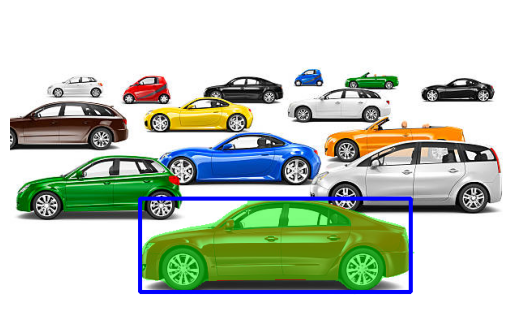

In [12]:
# Load the segmentation model (YOLO11-seg)
model_s = YOLO('yolo11s-seg.pt')  # Ensure you have the segmentation model

# Load the classification model (YOLO11s-cls)
model_c = YOLO('yolo11s-cls.pt')

# Run segmentation model on the image
results_s = model_s(img_s)

largest_area = 0
largest_index = -1
masks = results_s[0].masks  # Get masks from the results
boxes = results_s[0].boxes  # Get bounding boxes


# Iterate through the boxes in the results object 
if masks is not None:
    for i, (box, mask) in enumerate(zip(boxes, masks.xy)): 
         # For each box, obtain the coordinates of the box, evaluate area
        x1, y1, x2, y2 = box.xyxy[0]  # Get bounding box coordinates
        area = (x2 - x1) * (y2 - y1)  # Compute area

        if area > largest_area:
            largest_area = area
            largest_index = i

    if largest_index != -1:
        # Draw the segmentation mask of the largest car
        mask = masks.xy[largest_index]  # Get the largest mask coordinates
        mask = np.array(mask, np.int32)  # Convert to numpy array

       

        # Overlay mask on the image
        overlay = img_s.copy()
        cv2.fillPoly(overlay, [mask], (0, 255, 0))  # Green mask
        alpha = 0.5
        img_s = cv2.addWeighted(overlay, alpha, img_s, 1 - alpha, 0)

                # Draw a blue bounding box around the largest car
        x1, y1, x2, y2 = boxes[largest_index].xyxy[0]
        cv2.rectangle(img_s, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 3)  # Blue box
        
        
# Show the segmentation result using plt.imshow
plt.imshow(img_s)
plt.axis("off")  # Hide axes
plt.show()





3.1.2 Draw the segmentation mask of the largest car : Use ultralytics + supervision libraries

In [ ]:
# Run a segmentation model on the image using ultralytics libraries & a model of your choice

# Transfer ultralytics results to supervision

# Iterate through the masks & find the largest

# Display the largest mask

100%|██████████| 5.90M/5.90M [00:03<00:00, 1.92MB/s]



0: 416x640 14 cars, 269.2ms
Speed: 3.0ms preprocess, 269.2ms inference, 51.7ms postprocess per image at shape (1, 3, 416, 640)


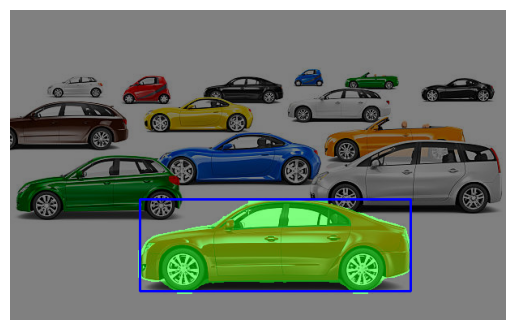

True

In [14]:
# Load the image
img_path = "cars1.jpg"
img = cv2.imread(img_path)


# Load the YOLO segmentation model
model_path = "yolo11n-seg.pt"
yolo_model = YOLO(model_path)

# Run the segmentation model on the image
results = yolo_model(img)

#convert the results to supervision format
largest_area = 0
largest_mask = None
largest_box = None

detections = sv.Detections.from_ultralytics(results[0])

# Find the largest car mask and bounding box
if detections.mask is not None and len(detections.mask) > 0:
    for i, (box, mask) in enumerate(zip(detections.xyxy, detections.mask)):
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        area = width * height
        
        # Find the largest detected car
        if area > largest_area:
            largest_area = area
            largest_mask = mask
            largest_box = (int(x1), int(y1), int(x2), int(y2))

# Draw the largest mask if found
if largest_mask is not None:
    mask_np = np.array(largest_mask, dtype=np.float32)
    mask_np = mask_np.astype(np.uint8)  # Convert to uint8
    mask_np = cv2.resize(mask_np, (img.shape[1], img.shape[0]))  # Resize to match image size
    mask_colored = np.zeros_like(img)
    mask_colored[mask_np > 0] = (0, 255, 0)  # Apply green mask
    
    # Overlay mask on the image
    img = cv2.addWeighted(mask_colored, 0.5, img, 1 - 0.5, 0)
    
    # Draw bounding box
    if largest_box is not None:
        x1, y1, x2, y2 = largest_box
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue bounding box

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show and save the output
plt.imshow(img_rgb)
plt.axis("off")  # Hide axes
plt.show()
cv2.imwrite("largest_car_mask_supervision.jpg", img)




        
    

3.2 Estimate distance to centroid of chair 

In [20]:
# Detect the chair in the image  - A detection model of your choice can be used

# Calculate the centroid of the chair - Access box coordinates from the detection model and calculate the centroid

# Obtain the depth map - Depth Anything V2 can be used 

# Query the value of the depth map at the centroid's location


0: 384x640 1 chair, 236.6ms
Speed: 4.0ms preprocess, 236.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Estimated depth at chair centroid: 0.0


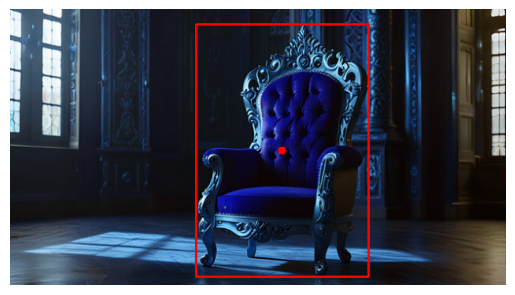

In [21]:
from depth_anything_v2.dpt import DepthAnythingV2
import torchvision.transforms as transforms

# Load the image
img_path = "kingChair.jpg"
img = cv2.imread(img_path)
if img is None:
    raise FileNotFoundError(f"Error loading image: {img_path}")

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ensure image dimensions are multiples of 14
H, W, _ = img_rgb.shape
new_H = (H // 14) * 14  # Round down to the nearest multiple of 14
new_W = (W // 14) * 14  # Round down to the nearest multiple of 14
img_rgb = cv2.resize(img_rgb, (new_W, new_H))

# Load YOLO11 object detection model
detection_model = YOLO("yolo11s.pt")

# Perform object detection
results = detection_model(img_rgb)

# Find the centroid of the detected chair
centroid_x, centroid_y = None, None
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        label = result.names[int(box.cls[0])]
        if "chair" in label.lower():
            centroid_x = int((x1 + x2) / 2)
            centroid_y = int((y1 + y2) / 2)
            # Draw bounding box
            cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Blue box
            break
    if centroid_x is not None:
        break

if centroid_x is None or centroid_y is None:
    raise ValueError("No chair detected in the image.")

# Load Depth Anything V2 model for depth estimation
depth_model = DepthAnythingV2()

# Convert image to PyTorch tensor with correct shape
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts (H, W, C) to (C, H, W)
])
img_tensor = transform(img_rgb).unsqueeze(0)  # Add batch dimension (1, C, H, W)

# Run depth estimation
with torch.no_grad():
    depth_map = depth_model(img_tensor).squeeze(0).cpu().numpy()  # Convert back to NumPy

# Query depth at the centroid
chair_depth = depth_map[centroid_y, centroid_x]
print(f"Estimated depth at chair centroid: {chair_depth}")

# Draw centroid on the image
cv2.circle(img_rgb, (centroid_x, centroid_y), 5, (0, 0, 255), -1)  # Red dot

# Display the image with bounding box and centroid
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

3.3.1  Draw bounding boxes around the "cars" using supervision. 

In [86]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\vyshn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [87]:
# Downloads the video file from the google drive link, you'll have to "pip install gdown" first
import gdown

file_id = "1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4"
direct_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(direct_url, "vehicles_video.mp4", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zcKvnDDEdyFF4B0B3eYud6DHU19nl0o4
To: e:\Studies PDFs\8th Semi\ETM 4272 - Machine Vision Systems\Assignment 3\ETM4272-main\vehicles_video.mp4
100%|██████████| 35.3M/35.3M [00:11<00:00, 3.02MB/s]


'vehicles_video.mp4'

In [16]:
# Load the YOLO detection model
model = YOLO("yolo11n.pt")

# Define the callback function to process each frame
def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO object detection on the frame
    results = model(frame)
    
    # Create a copy of the frame to draw on
    output_frame = frame.copy()
    
    # Iterate through detections
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            label = result.names[int(box.cls[0])]
            
            # Draw bounding box if the detected object is a car
            if "car" in label.lower():
                cv2.rectangle(output_frame, (x1, y1), (x2, y2), (255, 0, 0), 4)  # Blue box
                #cv2.putText(output_frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 3)
    return output_frame

# Process the video and save results
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking_with_bounding_boxes.mp4",
    callback=callback
)


100%|██████████| 5.35M/5.35M [00:02<00:00, 2.04MB/s]



0: 384x640 3 cars, 1 truck, 144.3ms
Speed: 4.8ms preprocess, 144.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 175.1ms
Speed: 4.8ms preprocess, 175.1ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 252.1ms
Speed: 6.5ms preprocess, 252.1ms inference, 9.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 261.5ms
Speed: 10.1ms preprocess, 261.5ms inference, 9.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 165.5ms
Speed: 24.6ms preprocess, 165.5ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 143.7ms
Speed: 4.0ms preprocess, 143.7ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 155.0ms
Speed: 4.0ms preprocess, 155.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 135.2ms
Speed: 3.7ms pre

3.3.1 Track the cars. Add the tracker id to the bounding boxes around the cars. Use supervision

In [22]:
# Load the YOLO detection model
model = YOLO("yolo11n.pt")

# Initialize Supervision tracker
tracker = sv.ByteTrack()

# Initialize Supervision annotator with a bold blue bounding box
box_annotator = sv.BoxAnnotator(thickness=4, color=sv.Color.BLUE)

# Define the callback function to process each frame
def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO object detection on the frame
    results = model(frame)[0]
    
    # Extract bounding boxes, class IDs, and confidence scores
    detections = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    class_ids = results.boxes.cls.cpu().numpy().astype(int)  # Class IDs
    confidences = results.boxes.conf.cpu().numpy()  # Confidence scores
    
    # Create Supervision Detections object
    detections = sv.Detections(xyxy=detections, confidence=confidences, class_id=class_ids)
    
    # Filter detections to only include 'car' class (assuming class_id 2 for cars, check model labels)
    car_class_id = 2
    mask = detections.class_id == car_class_id
    detections = detections[mask]
    
    # Track detections
    detections = tracker.update_with_detections(detections)
    
    # Prepare labels
    labels = [f"Car {tracker_id}" for tracker_id in detections.tracker_id]
    
    # Annotate frame with a bold blue bounding box
    frame = box_annotator.annotate(frame, detections)
    
    # Annotate tracker ID with bold black outline and white fill
    for i, label in enumerate(labels):
        x, y = int(detections.xyxy[i][0]), int(detections.xyxy[i][1]) - 10
        cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)  # Black border
        cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)  # White text
    
    return frame

# Process the video and save results
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_tracking_WithID.mp4",
    callback=callback
)


0: 384x640 3 cars, 1 truck, 192.5ms
Speed: 4.0ms preprocess, 192.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 132.7ms
Speed: 5.9ms preprocess, 132.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 95.9ms
Speed: 4.0ms preprocess, 95.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 97.1ms
Speed: 4.8ms preprocess, 97.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 263.4ms
Speed: 8.0ms preprocess, 263.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 199.8ms
Speed: 8.4ms preprocess, 199.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 205.6ms
Speed: 6.4ms preprocess, 205.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 143.5ms
Speed: 6.0ms preproces

3.3.2 Draw the track traces for the tracked cars. Use supervision

In [23]:
# Load the YOLO detection model
model = YOLO("yolo11n.pt")

# Initialize Supervision tracker
tracker = sv.ByteTrack()

# Initialize Supervision annotator with a bold blue bounding box
box_annotator = sv.BoxAnnotator(thickness=4, color=sv.Color.BLUE)

# Dictionary to store track traces
track_traces = {}

# Define the callback function to process each frame
def callback(frame: np.ndarray, _: int) -> np.ndarray:
    # Run YOLO object detection on the frame
    results = model(frame)[0]
    
    # Extract bounding boxes, class IDs, and confidence scores
    detections = results.boxes.xyxy.cpu().numpy()  # Bounding boxes
    class_ids = results.boxes.cls.cpu().numpy().astype(int)  # Class IDs
    confidences = results.boxes.conf.cpu().numpy()  # Confidence scores
    
    # Create Supervision Detections object
    detections = sv.Detections(xyxy=detections, confidence=confidences, class_id=class_ids)
    
    # Filter detections to only include 'car' class (assuming class_id 2 for cars, check model labels)
    car_class_id = 2
    mask = detections.class_id == car_class_id
    detections = detections[mask]
    
    # Track detections
    detections = tracker.update_with_detections(detections)
    
    # Prepare labels
    labels = [f"Car {tracker_id}" for tracker_id in detections.tracker_id]
    
    # Annotate frame with a bold blue bounding box
    frame = box_annotator.annotate(frame, detections)
    
    # Draw track traces in red
    for i, track_id in enumerate(detections.tracker_id):
        x, y = int(detections.xyxy[i][0] + detections.xyxy[i][2]) // 2, int(detections.xyxy[i][1] + detections.xyxy[i][3]) // 2
        
        if track_id not in track_traces:
            track_traces[track_id] = []
        track_traces[track_id].append((x, y))
        
        # Keep only the last 50 points to avoid clutter
        if len(track_traces[track_id]) > 50:
            track_traces[track_id].pop(0)
        
        # Draw track lines
        for j in range(1, len(track_traces[track_id])):
            cv2.line(frame, track_traces[track_id][j - 1], track_traces[track_id][j], (0, 0, 255), 5)
    
    # Annotate tracker ID with bold black outline and white fill
    for i, label in enumerate(labels):
        x, y = int(detections.xyxy[i][0]), int(detections.xyxy[i][1]) - 10
        cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 5)  # Black border
        cv2.putText(frame, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)  # White text
    
    return frame

# Process the video and save results
sv.process_video(
    source_path="vehicles_video.mp4",
    target_path="result_trackingWithTraces.mp4",
    callback=callback
)



0: 384x640 3 cars, 1 truck, 241.4ms
Speed: 4.2ms preprocess, 241.4ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 1 truck, 213.5ms
Speed: 19.4ms preprocess, 213.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 180.8ms
Speed: 5.1ms preprocess, 180.8ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 226.8ms
Speed: 8.0ms preprocess, 226.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 175.1ms
Speed: 5.2ms preprocess, 175.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 112.3ms
Speed: 4.0ms preprocess, 112.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 119.8ms
Speed: 3.2ms preprocess, 119.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 193.6ms
Speed: 5.9ms prep

Questions:

Explain what "def callback(frame: np.ndarray, _: int) -> np.ndarray:" does. 

Answers: 
In computer vision and video processing, a callback function is a crucial component used to process frames in real time. The function callback(frame: np.ndarray, _: int) -> np.ndarray is specifically designed for scenarios where frames are continuously received, modified, and then returned for further processing. This is commonly seen in video analysis, object detection, and tracking applications. By implementing a callback function, we ensure that each frame is analyzed, processed, and annotated dynamically, allowing seamless tracking of objects such as cars in a video.

Callback Function Purpose :

The function is called automatically for every video frame, making it ideal for real-time processing. The callback function processes each frame, detects and tracks cars, assigns unique IDs, and draws bounding boxes and track traces. It ensures that moving objects are continuously monitored as they appear and disappear across frames, providing a seamless tracking experience.

Parameters & Return Type :

The function takes two parameters: frame, which is a NumPy array representing an image, and _, which is an integer placeholder for the frame index (unused in the function). The return type -> np.ndarray means that the function modifies the frame by adding bounding boxes and track traces before returning it for display or saving. This structure ensures that each frame is updated with new detections while preserving the original video structure.

Detecting Objects Using YOLO:

To detect objects in the frame, the function calls the YOLO model using model(frame)[0]. This runs object detection and extracts key details such as bounding boxes (object locations), class labels (what the object is), and confidence scores (certainty of detection). These details are essential for identifying objects of interest, in this case, cars.

Extracting Detection Information:

Once objects are detected, the function extracts bounding boxes, class IDs, and confidence scores from the YOLO results and converts them into NumPy arrays. These values are stored in variables for further processing, allowing the function to filter, track, and annotate objects efficiently.

Filtering Only Cars:

Since the function focuses on tracking cars, it filters out non-car objects using their class IDs. By keeping only class ID 2 (which represents cars), the function ensures that only relevant objects are tracked. This step is crucial for avoiding unnecessary detections and maintaining accurate tracking data.

Tracking Cars with Unique IDs:

To track cars across multiple frames, the function updates the tracker using tracker.update_with_detections(detections). This assigns a unique tracking ID to each car, helping the function recognize and follow the same vehicle over time, even if it moves across different locations in the frame.

Drawing Bounding Boxes Around Cars:

The function uses box_annotator.annotate(frame, detections) to draw blue bounding boxes around detected cars. These boxes highlight the detected objects, making them easily visible in the output video. The bounding box color and thickness help differentiate tracked objects from the background.

Tracking Car Movement & Storing Positions:

For each detected car, the function calculates its center point using the bounding box coordinates. The center represents the car’s movement path. These center points are stored in a dictionary, allowing the function to keep track of past positions and visualize the car's movement.

Drawing Red Track Traces:

To display the movement path, the function connects the past positions of each tracked car with red lines. This is done using cv2.line(), which draws a bold red track trace behind each moving car. The track traces make it easy to see how cars have moved across frames, providing a clear motion history.

Labeling Cars with Tracker IDs:

Each detected car is labeled with a bold tracker ID using cv2.putText(). The label is displayed in white text with a black outline, ensuring high visibility against different backgrounds. This makes it easy to distinguish individual cars and track their movement accurately.

Returning Processed Frame:

Once the frame is updated with bounding boxes, track traces, and tracker IDs, it is returned using return frame. The modified frame is then saved or displayed, allowing real-time tracking and visualization. This ensures that the tracking process is continuous, frame by frame.

Practical Applications:

This function has various real-world applications. In traffic monitoring, it helps track vehicles on busy roads to analyze traffic patterns and detect violations. In autonomous driving, it assists self-driving cars in recognizing and avoiding other vehicles. In surveillance and security, it monitors moving vehicles in restricted areas, improving safety and efficiency. The ability to track and visualize car movements makes this function highly useful for real-time video analysis.

The function detects, tracks, and annotates cars in a video stream. Bounding boxes highlight detected cars, tracking IDs help identify vehicles, and red track traces visualize movement paths. The function returns a processed frame, allowing smooth, real-time tracking. This method ensures clear and accurate object tracking, making it a valuable tool for various video analysis applications.
